<a href="https://colab.research.google.com/github/AnshikaGoyal22/graph-realworld/blob/main/graph_realworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Social Network Friend Suggestion

## Overview

In social networks such as Facebook and LinkedIn, users increasingly rely on friend suggestion features to connect with potential new contacts. This problem models the social network as an undirected graph, where each node represents a user and each edge represents a friendship. The objective is to suggest new friends for a given user based on the concept of mutual friendships—specifically, friends-of-friends who are not already directly connected to the user.

## Graph Modeling

We represent users as nodes in the graph. Friendships between users are represented as undirected edges connecting those nodes. To efficiently store and traverse this network, we use an adjacency list where each user’s entry lists their direct friends.

## Algorithm Details

The algorithm uses Breadth-First Search (BFS) starting from the selected user to explore neighbors at increasing distances. Once it finds nodes at exactly two edges away (distance 2 in BFS terms), these nodes become candidates for friend suggestions, excluding any users directly connected or the original user.

## Input/Output Example

For example, consider user 'A' who has friends 'B' and 'C'. Friend 'B' is connected to 'D', and friend 'C' is connected to 'E'. The friend suggestion for 'A' will be ['D', 'E'], users reachable at distance 2.

## Complexity Analysis

- Time Complexity: \(O(n + m)\), where \(n\) is the number of users (nodes) and \(m\) is the number of friendships (edges). BFS visits each node and edge once.
- Space Complexity: \(O(n + m)\) for storing the graph as an adjacency list and the auxiliary data structures used during BFS.
- This approach scales well to large social networks due to linear time complexity.


In [2]:
from collections import deque

class Graph:
    def __init__(self):
        self.adj = {}

    def add_edge(self, u, v):
        if u not in self.adj:
            self.adj[u] = set()
        if v not in self.adj:
            self.adj[v] = set()
        self.adj[u].add(v)
        self.adj[v].add(u)

    def suggest_friends(self, user):
        visited = set()
        queue = deque()
        suggestions = set()

        visited.add(user)
        queue.append((user, 0))

        while queue:
            current, level = queue.popleft()
            if level == 2:
                suggestions.add(current)
            if level < 2:
                for neighbor in self.adj.get(current, []):
                    if neighbor not in visited:
                        visited.add(neighbor)
                        queue.append((neighbor, level + 1))

        direct_friends = self.adj.get(user, set())
        final_suggestions = suggestions - direct_friends - {user}
        return list(final_suggestions)

# Example Usage:
g = Graph()
g.add_edge("A", "B")
g.add_edge("A", "C")
g.add_edge("B", "D")
g.add_edge("C", "E")
print(g.suggest_friends("A"))


['E', 'D']


In [8]:
pip install matplotlib memory_profiler

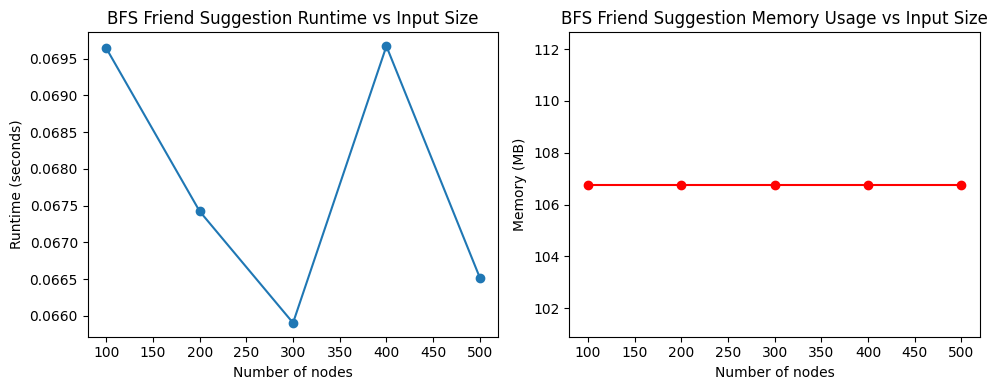

In [12]:
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
from collections import deque

class FriendGraph:
    def __init__(self):
        self.adj = {}
    def add_edge(self, u, v):
        if u not in self.adj:
            self.adj[u] = set()
        if v not in self.adj:
            self.adj[v] = set()
        self.adj[u].add(v)
        self.adj[v].add(u)
    def suggest_friends(self, user):
        visited = set()
        queue = deque()
        suggestions = set()

        visited.add(user)
        queue.append((user, 0))

        while queue:
            current, level = queue.popleft()
            if level == 2:
                suggestions.add(current)
            if level < 2:
                for neighbor in self.adj.get(current, []):
                    if neighbor not in visited:
                        visited.add(neighbor)
                        queue.append((neighbor, level + 1))

        direct_friends = self.adj.get(user, set())
        final_suggestions = suggestions - direct_friends - {user}
        return list(final_suggestions)

def profile_bfs(graph, user):
    start = time.time()
    mem = memory_usage((graph.suggest_friends, (user,)), max_usage=True)
    end = time.time()
    return end - start, mem  # No subscript!

sizes = [100, 200, 300, 400, 500]
runtimes = []
memories = []

for size in sizes:
    g = FriendGraph()
    for i in range(size-1):
        g.add_edge(str(i), str(i+1))
    rt, mem = profile_bfs(g, "0")
    runtimes.append(rt)
    memories.append(mem)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(sizes, runtimes, marker='o')
plt.title('BFS Friend Suggestion Runtime vs Input Size')
plt.xlabel('Number of nodes')
plt.ylabel('Runtime (seconds)')

plt.subplot(1,2,2)
plt.plot(sizes, memories, marker='o', color='r')
plt.title('BFS Friend Suggestion Memory Usage vs Input Size')
plt.xlabel('Number of nodes')
plt.ylabel('Memory (MB)')

plt.tight_layout()
plt.show()

# Problem 2: Route Finding on Google Maps (Bellman-Ford Algorithm)

## Overview

This problem addresses the shortest path routing in a network of cities connected by roads which may have positive or negative travel times (e.g., due to toll rebates or delays). The goal is to find the shortest distance from a source city to all other cities, and to detect if a negative weight cycle exists, indicating inconsistent routing data.

## Graph Modeling

Cities are modeled as nodes and roads as directed edges with weights representing travel times. The graph is stored as an edge list for convenient iteration during the Bellman-Ford relaxation steps.

## Algorithm Details

Bellman-Ford algorithm is suitable for graphs with negative weights and works by iteratively relaxing all edges \(V-1\) times, where \(V\) is the number of nodes. It then checks for negative weight cycles by verifying if any edge can still be relaxed. If yes, the graph contains a negative cycle.

## Input/Output Example

For example, given cities A, B, C with roads: A->B (4), B->C (-2), A->C (5), the shortest distances from A are: A=0, B=4, C=2.

## Complexity Analysis

- Time Complexity: \(O(V \times E)\), where \(V\) is the number of vertices and \(E\) is the number of edges.
- Space Complexity: \(O(V + E)\) for storing distances and graph edges.
- Bellman-Ford is slower compared to Dijkstra but necessary for graphs with negative weights.


In [4]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.edges = []

    def add_edge(self, u, v, w):
        self.edges.append((u, v, w))

    def bellman_ford(self, src):
        dist = {i: float('inf') for i in range(self.V)}
        dist[src] = 0

        for _ in range(self.V - 1):
            for u, v, w in self.edges:
                if dist[u] != float('inf') and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Check for negative weight cycles
        for u, v, w in self.edges:
            if dist[u] != float('inf') and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return None

        return dist

# Example Usage:
g = Graph(3)  # Cities labeled 0,1,2
g.add_edge(0, 1, 4)   # A->B
g.add_edge(1, 2, -2)  # B->C
g.add_edge(0, 2, 5)   # A->C

distances = g.bellman_ford(0)
if distances:
    print("Shortest distances from city 0:", distances)

Shortest distances from city 0: {0: 0, 1: 4, 2: 2}


Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.
Negative cycle detected.


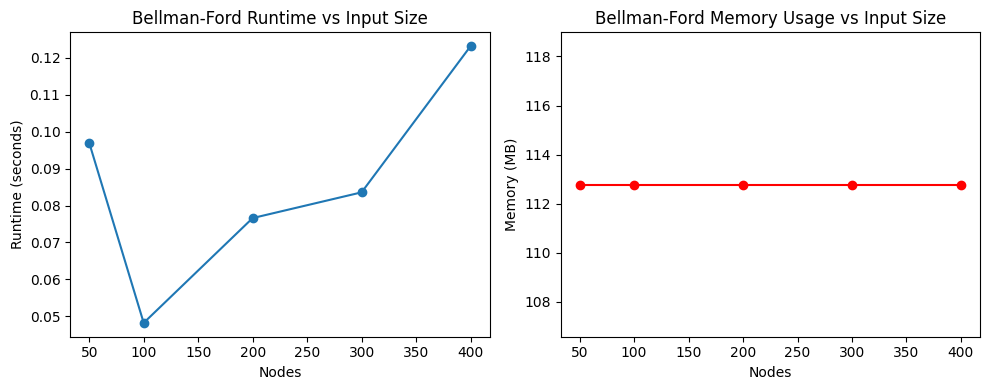

In [13]:
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

class BFGraph:
    def __init__(self, vertices):
        self.V = vertices
        self.edges = []

    def add_edge(self, u, v, w):
        self.edges.append((u, v, w))

    def bellman_ford(self, src):
        dist = {i: float('inf') for i in range(self.V)}
        dist[src] = 0
        for _ in range(self.V - 1):
            for u, v, w in self.edges:
                if dist[u] != float('inf') and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
        for u, v, w in self.edges:
            if dist[u] != float('inf') and dist[u] + w < dist[v]:
                print("Negative cycle detected.")
                return None
        return dist

def profile_bellman_ford(graph, src):
    start = time.time()
    mem = memory_usage((graph.bellman_ford, (src,)), max_usage=True)
    end = time.time()
    return end - start, mem

sizes = [50, 100, 200, 300, 400]
runtimes, memories = [], []

for size in sizes:
    g = BFGraph(size)
    for i in range(size*2):  # more edges for density
        u = i % size
        v = (i*3) % size
        w = (i % 10) - 5    # allows for negative weights
        g.add_edge(u, v, w)
    rt, mem = profile_bellman_ford(g, 0)
    runtimes.append(rt)
    memories.append(mem)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(sizes, runtimes, marker='o')
plt.title('Bellman-Ford Runtime vs Input Size')
plt.xlabel('Nodes')
plt.ylabel('Runtime (seconds)')
plt.subplot(1,2,2)
plt.plot(sizes, memories, marker='o', color='r')
plt.title('Bellman-Ford Memory Usage vs Input Size')
plt.xlabel('Nodes')
plt.ylabel('Memory (MB)')
plt.tight_layout()
plt.show()

# Problem 3: Emergency Response Routing (Dijkstra's Algorithm)

## Overview

In emergency management, it is vital to find the fastest route for vehicles like ambulances or fire trucks to reach their destinations. This problem models the city's road intersections as nodes and travel times as weighted directed edges. The goal is to compute the shortest travel time from a source intersection to all others.

## Graph Modeling

Intersections are represented as graph nodes, and roads connecting them are directed edges weighted by travel time. This graph is stored using adjacency lists with weights for quick access and updates.

## Algorithm Details

Dijkstra's algorithm is used to find the shortest path from the source node to all other nodes in graphs with non-negative edge weights. It uses a priority queue (min-heap) to greedily select the next closest node to process, updating distances efficiently.

## Input/Output Example

Given a network where intersection 0 connects to 1 (time 2) and 2 (time 4), and 1 connects to 2 (time 1), the shortest paths from 0 are: 0->0=0, 0->1=2, 0->2=3.

## Complexity Analysis

- Time complexity: \(O(E \log V)\) using a min-priority queue, where \(E\) is the number of edges and \(V\) is the number of vertices.
- Space complexity: \(O(V+E)\) for the adjacency list and auxiliary structures.
- Dijkstra’s algorithm is efficient for routing problems with all positive edge weights.

In [5]:
import heapq

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj = {i: [] for i in range(vertices)}

    def add_edge(self, u, v, w):
        self.adj[u].append((v, w))

    def dijkstra(self, src):
        dist = {i: float('inf') for i in range(self.V)}
        dist[src] = 0
        pq = [(0, src)]  # (distance, node)

        while pq:
            current_dist, u = heapq.heappop(pq)

            if current_dist > dist[u]:
                continue

            for neighbor, weight in self.adj[u]:
                distance = current_dist + weight
                if distance < dist[neighbor]:
                    dist[neighbor] = distance
                    heapq.heappush(pq, (distance, neighbor))

        return dist

# Example usage:
g = Graph(3)  # 3 intersections labeled 0, 1, 2
g.add_edge(0, 1, 2)  # road 0->1 with travel time 2
g.add_edge(0, 2, 4)  # road 0->2 with travel time 4
g.add_edge(1, 2, 1)  # road 1->2 with travel time 1

distances = g.dijkstra(0)
print("Shortest distances from intersection 0:", distances)


Shortest distances from intersection 0: {0: 0, 1: 2, 2: 3}


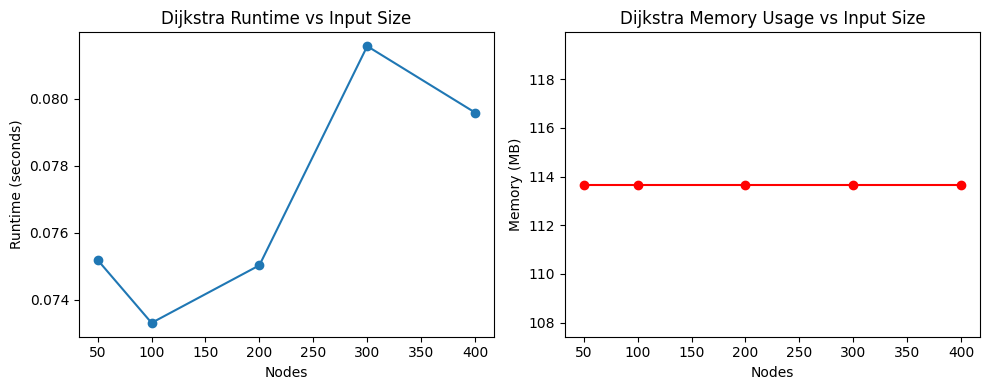

In [14]:
import heapq

class DijGraph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj = {i: [] for i in range(vertices)}
    def add_edge(self, u, v, w):
        self.adj[u].append((v, w))
    def dijkstra(self, src):
        dist = {i: float('inf') for i in range(self.V)}
        dist[src] = 0
        pq = [(0, src)]
        while pq:
            current_dist, u = heapq.heappop(pq)
            if current_dist > dist[u]:
                continue
            for neighbor, weight in self.adj[u]:
                distance = current_dist + weight
                if distance < dist[neighbor]:
                    dist[neighbor] = distance
                    heapq.heappush(pq, (distance, neighbor))
        return dist

def profile_dijkstra(graph, src):
    start = time.time()
    mem = memory_usage((graph.dijkstra, (src,)), max_usage=True)
    end = time.time()
    return end - start, mem

sizes = [50, 100, 200, 300, 400]
runtimes, memories = [], []

for size in sizes:
    g = DijGraph(size)
    for i in range(size*3):  # dense graph
        u = i % size
        v = (i*7) % size
        w = (i % 10) + 1
        g.add_edge(u, v, w)
    rt, mem = profile_dijkstra(g, 0)
    runtimes.append(rt)
    memories.append(mem)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(sizes, runtimes, marker='o')
plt.title('Dijkstra Runtime vs Input Size')
plt.xlabel('Nodes')
plt.ylabel('Runtime (seconds)')
plt.subplot(1,2,2)
plt.plot(sizes, memories, marker='o', color='r')
plt.title('Dijkstra Memory Usage vs Input Size')
plt.xlabel('Nodes')
plt.ylabel('Memory (MB)')
plt.tight_layout()
plt.show()

# Problem 4: Network Cable Installation (Minimum Spanning Tree)

## Overview

The task is to connect multiple office locations with network cables using minimum total cable length to reduce cost. This problem models the offices as nodes and potential cable paths as weighted edges. The goal is to find a Minimum Spanning Tree (MST) connecting all offices with minimum cable cost.

## Graph Modeling

Each office is a node, and edges represent possible cable connections weighted by their length or cost. The graph is undirected, and an adjacency list is used for efficient representation.

## Algorithm Details

Prim’s or Kruskal’s algorithm are used to find the MST. Prim’s algorithm grows the MST one edge at a time using a priority queue, while Kruskal’s algorithm sorts edges and adds them ensuring no cycles using Union-Find data structure.

## Input/Output Example

Given offices 0, 1, 2 and edges 0-1 (cost 10), 1-2 (cost 5), 0-2 (cost 15), the MST includes edges 1-2 and 0-1 with a total cost of 15.

## Complexity Analysis

- Time Complexity: Prim’s algorithm using a priority queue runs in \(O(E \log V)\).
- Space Complexity: \(O(V+E)\) for graph storage and MST sets.
- MST algorithms efficiently produce minimal cable network solutions.


In [6]:
import heapq

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj = {i: [] for i in range(vertices)}

    def add_edge(self, u, v, w):
        self.adj[u].append((v, w))
        self.adj[v].append((u, w))  # undirected graph

    def prim_mst(self):
        mst_set = set()
        edge_heap = [(0, 0)]  # (weight, vertex)
        total_cost = 0
        while edge_heap and len(mst_set) < self.V:
            weight, u = heapq.heappop(edge_heap)
            if u in mst_set:
                continue
            mst_set.add(u)
            total_cost += weight
            for v, w in self.adj[u]:
                if v not in mst_set:
                    heapq.heappush(edge_heap, (w, v))
        if len(mst_set) != self.V:
            print("Graph is not connected, MST not possible")
            return None
        return total_cost

# Example usage:
g = Graph(3)
g.add_edge(0, 1, 10)
g.add_edge(1, 2, 5)
g.add_edge(0, 2, 15)

cost = g.prim_mst()
print("Total cable cost for MST:", cost)


Total cable cost for MST: 15


Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected
Graph not connected


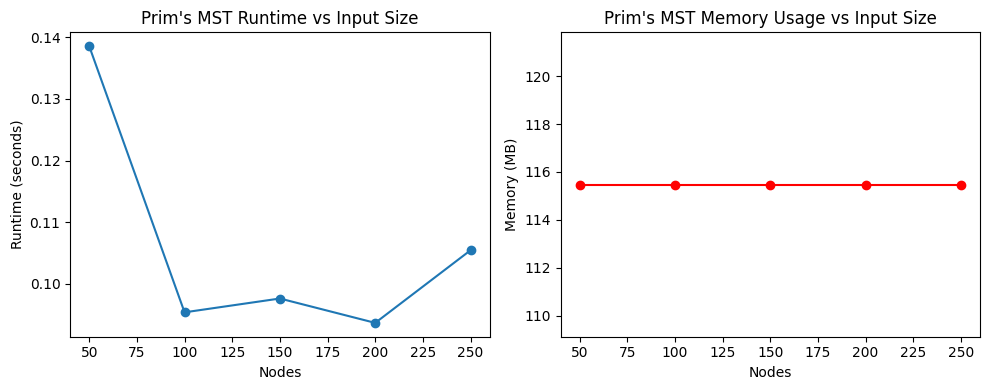

In [15]:
import heapq

class PrimGraph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj = {i: [] for i in range(vertices)}
    def add_edge(self, u, v, w):
        self.adj[u].append((v, w))
        self.adj[v].append((u, w))
    def prim_mst(self):
        mst_set = set()
        edge_heap = [(0, 0)]
        total_cost = 0
        while edge_heap and len(mst_set) < self.V:
            weight, u = heapq.heappop(edge_heap)
            if u in mst_set:
                continue
            mst_set.add(u)
            total_cost += weight
            for v, w in self.adj[u]:
                if v not in mst_set:
                    heapq.heappush(edge_heap, (w, v))
        if len(mst_set) != self.V:
            print("Graph not connected")
            return None
        return total_cost

def profile_prim(graph):
    start = time.time()
    mem = memory_usage((graph.prim_mst, ()), max_usage=True)
    end = time.time()
    return end - start, mem

sizes = [50, 100, 150, 200, 250]
runtimes, memories = [], []

for size in sizes:
    g = PrimGraph(size)
    for i in range(size*2):  # edges
        u = i % size
        v = (i*5) % size
        w = (i % 20) + 1
        if u != v:
            g.add_edge(u, v, w)
    rt, mem = profile_prim(g)
    runtimes.append(rt)
    memories.append(mem)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(sizes, runtimes, marker='o')
plt.title("Prim's MST Runtime vs Input Size")
plt.xlabel('Nodes')
plt.ylabel('Runtime (seconds)')
plt.subplot(1,2,2)
plt.plot(sizes, memories, marker='o', color='r')
plt.title("Prim's MST Memory Usage vs Input Size")
plt.xlabel('Nodes')
plt.ylabel('Memory (MB)')
plt.tight_layout()
plt.show()